## import library

In [20]:
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
import time 
import re 
import json 
import pandas as pd
import numpy as np

&nbsp;

## 로그인

&nbsp;

### 로그인 파라미터 지정

In [7]:
user_id= "tae_youth" 
user_passwd="xod970917"
login_option = "instagram"         # facebook이나 instargram 택 1
driver_path="./chromedriver"
instagram_id_name="username"
instagram_pw_name="password"
instagram_login_btn=".sqdOP.L3NKy.y3zKF "
facebook_login_page_css=".sqdOP.L3NKy.y3zKF "
facebook_login_page_css2=".sqdOP.yWX7d.y3zKF "
facebook_id_form_name="email"
facebook_pw_form_name="pass"
facebook_login_btn_name="login"

#### url 열기

&nbsp;

### instagram 로그인

In [8]:
if login_option == "instagram":
    try: 
        #url 열기
        print(f"login start - option {login_option}") 
        driver = wd.Chrome(executable_path="chromedriver.exe") 
        login_url = "https://www.instagram.com/accounts/login/" 
        driver.get(login_url) 
        time.sleep(10)
        
        #로그인/PW 버튼 찾아서 로그인
        
        instagram_id_form = driver.find_element_by_name(instagram_id_name)
        instagram_id_form.send_keys(user_id)
        time.sleep(5) 
        
        instagram_pw_form = driver.find_element_by_name(instagram_pw_name) 
        instagram_pw_form.send_keys(user_passwd) 
        time.sleep(7) 
        
        login_ok_button = driver.find_element_by_css_selector(instagram_login_btn) 
        login_ok_button.click() 
        is_login_success = True 
        
        
    except: 
        print("instagram login fail") 
        is_login_success = False

login start - option instagram


여기까지 실행했으면 로그인 시 뜨는 '나중에 하기' 버튼을 직접 한번 눌러줘야 함

&nbsp;

### instagram 크롤링 코드

게시물이 있는 해시태그 url 입력

In [14]:
url = 'https://www.instagram.com/explore/tags/%EC%97%B0%EB%82%A8%EB%8F%99/' # 연남동 해시태그

time.sleep(10) 
driver.get(url) 
time.sleep(10)

In [18]:
# 첫번째 게시물 클릭
first_img_css="div.v1Nh3.kIKUG._bz0w" 
driver.find_element_by_css_selector(first_img_css).click()

데이터 저장 변수 선언

In [19]:
# data lists 
location_infos = [] 
location_hrefs = [] 
upload_ids = [] 
date_texts = [] 
date_times = [] 
date_titles = [] 
main_texts = [] 
instagram_tags = [] 
comments = [] 
check_arrow = True   # 다음 게시글이 있는지 체크하는 변수
count_extract = 0  # 현재까지 추출된 게시물의 개수
wish_num = 1000      # 추출하고자 하는 게시물의 개수 
instagram_tags = [] 
instagram_tag_dates = []

**데이터 추출**

In [20]:
location_object_css="div.o-MQd.z8cbW > div.M30cS > div.JF9hh > a.O4GlU" 
upload_id_object_css="div.e1e1d > span.Jv7Aj.MqpiF > a.sqdOP.yWX7d._8A5w5.ZIAjV " 
date_object_css="div.k_Q0X.NnvRN > a.c-Yi7 > time._1o9PC.Nzb55" 
main_text_object_css="div.C7I1f.X7jCj > div.C4VMK > span" 
tag_css=".C7I1f.X7jCj" 
comment_more_btn="button.dCJp8.afkep" 
comment_ids_objects_css="ul.Mr508 > div.ZyFrc > li.gElp9.rUo9f > div.P9YgZ > div.C7I1f > div.C4VMK > h3" 
comment_texts_objects_css="ul.Mr508 > div.ZyFrc > li.gElp9.rUo9f > div.P9YgZ > div.C7I1f > div.C4VMK > span" 
print_flag=False    # 실시간으로 출력할건지 여부
next_arrow_btn_css1="._65Bje.coreSpriteRightPaginationArrow" 
next_arrow_btn_css2="._65Bje.coreSpriteRightPaginationArrow" 

while True: 
    if count_extract > wish_num: 
        break 
    time.sleep(5.0) 
    
    if check_arrow == False:
        print('No check arrow')
        break 
    # 위치정보     
    try: 
        location_object = driver.find_element_by_css_selector(location_object_css)
        location_info = location_object.text 
        location_href = location_object.get_attribute("href") 
    except: 
        location_info = None 
        location_href = None 
    
    print('location done')
        
    # 올린사람 ID 
    try: 
        upload_id_object = driver.find_element_by_css_selector(upload_id_object_css) 
        upload_id = upload_id_object.text 
    except: 
        upload_id = None 
    
    print('id done')
    
    # 날짜 
    try: 
        date_object = driver.find_element_by_css_selector(date_object_css) 
        date_text = date_object.text 
        date_time = date_object.get_attribute("datetime") 
        date_title = date_object.get_attribute("title") 
    except: 
        date_text = None 
        date_time = None 
        date_title = None 
    
    print('date done')
    
    # 본문 
    try: 
        main_text_object = driver.find_element_by_css_selector(main_text_object_css) 
        main_text = main_text_object.text 
    except: 
        main_text = None 
        
    print('main text done')
        
    ## 본문 속 태그 
    try: 
        data = driver.find_element_by_css_selector(tag_css) # C7I1f X7jCj 
        tag_raw = data.text 
        tags = re.findall('#[A-Za-z0-9가-힣]+', tag_raw) 
        tag = ''.join(tags).replace("#"," ") # "#" 제거 
        
        tag_data = tag.split() 
        
        for tag_one in tag_data: 
            instagram_tags.append(tag_one) 
    except: 
        tag_one = None           # 원본은 continue 에서 tag_one = None 으로 수정
        
    print('hash tag done')
        
    # 댓글 
    ## 더보기 버튼 클릭 
    try: 
        while True: 
            try: 
                more_btn = driver.find_element_by_css_selector(comment_more_btn)
                more_btn.click() 
            except: 
                break 
    except: 
        print("----------------------fail to click more btn----------------------------------")
        continue 
        
    print('more button done')    
        
    ## 댓글 데이터 
    try: 
        comment_data = {} 

        comment_ids_objects = driver.find_elements_by_css_selector(comment_ids_objects_css)

        comment_texts_objects = driver.find_elements_by_css_selector(comment_texts_objects_css) 
    
        try: 
            for i in range(len(comment_ids_objects)): 
                comment_data[str((i+1))] = {"comment_id":comment_ids_objects[i].text, "comment_text":comment_texts_objects[i].text} 
        except: 
            print("fail") 
        
    except: 
        comment_id = None 
        comment_text = None 
        comment_data = {} 
        
    print('comment_1 done') 
    
    try: 
        if comment_data != {}: 
            keys = list(comment_data.keys()) 

            for key in keys: 
                if comment_data[key]['comment_id'] == upload_id: 
                    tags = re.findall('#[A-Za-z0-9가-힣]+', comment_data[key]['comment_text']) 
                    tag = ''.join(tags).replace("#"," ") # "#" 제거 

                    tag_data = tag.split() 
                    for tag_one in tag_data: 
                        instagram_tags.append(tag_one) 

    except: 
        continue 
        
    print('comment_2 done') 
    
    
    location_infos.append(location_info) 
    location_hrefs.append(location_href) 

    upload_ids.append(upload_id) 

    date_texts.append(date_text) 
    date_times.append(date_time) 
    date_titles.append(date_title) 

    main_texts.append(main_text) 

    comment_json = json.dumps(comment_data) 

    comments.append(comment_json) 
    
    print('the count extract is')
    print(count_extract)

    if print_flag: 
        print("location_info : ", location_info) 
        print("location_href : ", location_href) 
        print("upload id : ", upload_id) 
        print("date : {} {} {}".format(date_text, date_time, date_title)) 
        print("main : ", main_text)
        print("comment : ", comment_data) 
        print("insta tags : ", instagram_tags) 

    try: 
        WebDriverWait(driver, 100).until(EC.presence_of_element_located((By.CSS_SELECTOR, next_arrow_btn_css1))) 
        driver.find_element_by_css_selector(next_arrow_btn_css2).click() 
    except: 
        check_arrow = False 

    count_extract += 1

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
0
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
1
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
2
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
3
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
4
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
5
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
6
location done
id done
date done
main text done
hash tag done
more button done
comme

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
63
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
64
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
65
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
66
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
67
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
68
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
69
location done
id done
date done
main text done
hash tag done
more button don

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
125
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
126
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
127
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
128
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
129
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
130
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
131
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
187
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
188
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
189
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
190
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
191
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
192
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
193
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
249
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
250
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
251
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
252
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
253
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
254
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
255
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
311
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
312
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
313
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
314
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
315
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
316
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
317
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
373
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
374
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
375
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
376
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
377
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
378
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
379
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
435
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
436
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
437
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
438
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
439
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
440
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
441
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
497
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
498
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
499
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
500
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
501
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
502
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
503
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
559
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
560
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
561
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
562
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
563
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
564
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
565
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
621
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
622
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
623
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
624
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
625
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
626
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
627
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
745
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
746
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
747
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
748
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
749
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
750
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
751
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
807
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
808
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
809
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
810
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
811
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
812
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
813
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
869
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
870
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
871
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
872
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
873
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
874
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
875
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
931
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
932
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
933
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
934
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
935
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
936
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
937
location done
id done
date done
main text done
hash tag done
more but

location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
993
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
994
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
995
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
996
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
997
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
998
location done
id done
date done
main text done
hash tag done
more button done
comment_1 done
comment_2 done
the count extract is
999
location done
id done
date done
main text done
hash tag done
more but

&nbsp;

### 추출한 파일 저장

In [21]:
save_file_name="instagram_extract" 
save_file_name_tag="instagram_tag"

try: 
    insta_info_df = pd.DataFrame({"location_info":location_infos, "location_href":location_hrefs, "upload_id":upload_ids, "date_text":date_texts, "date_time":date_times, "date_title":date_titles, "main_text":main_texts, "comment":comments}) 
    insta_info_df.to_csv("{}.csv".format(save_file_name), index=False) 
    
except: print("fail to save data") 
    
try: 
    insta_tag_df = pd.DataFrame({"tag":instagram_tags}) 
    insta_tag_df.to_csv("{}.csv".format(save_file_name_tag), index=False) 
except: 
    print("fail to save tag data") 
    
driver.close() 
driver.quit()

&nbsp;

## Word Clouding

In [91]:
## 파일 읽어서 리스트로 변환
instagram_tags = pd.read_csv('./instagram_tag.csv')
instagram_tags = list(np.array(instagram_tags['tag'].tolist()))

In [92]:
## 불용어 처리
stop_words = ['연남', '홍대','좋아요','좋아요반사','좋반','선팔하면맞팔','dailylook','광주','동성로','대구',
             '광주카페','부산카페','맞팔']
instagram_tags = [word for word in instagram_tags if word not in stop_words]

&nbsp;

### 빈도수 정렬

In [93]:
# 상위 빈도수 단어 200개 추출
from collections import Counter
count = Counter(instagram_tags)
common_tag_200 = count.most_common(200)

### 워드클라우드 그리기

In [94]:
from PIL import Image

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib

In [95]:
dict(common_tag_200)

{'연남동': 456,
 '카페': 91,
 '소통': 80,
 '이태원': 76,
 '연남동맛집': 72,
 '한남동': 69,
 '가로수길': 68,
 'ootd': 68,
 '인친': 67,
 '연남동카페': 65,
 '일상': 65,
 '서면': 63,
 'daily': 60,
 '얼스타그램': 57,
 '데일리': 57,
 '서울카페': 57,
 '해운대': 56,
 '상무지구': 51,
 '오오티디': 48,
 '동명동': 47,
 '운동': 44,
 '수원': 44,
 '맞팔해요': 43,
 '인천': 43,
 '대전': 43,
 '강남': 43,
 '데일리룩': 42,
 '선팔': 41,
 '연희동': 41,
 'igers': 39,
 'selfie': 39,
 '홍대맛집': 39,
 '충장로': 37,
 '팔로우': 37,
 '연남동데이트': 37,
 '셀카': 34,
 '셀스타그램': 33,
 '셀피': 32,
 '경의선숲길': 30,
 '연남동맛집추천': 24,
 'outfit': 24,
 '압구정': 22,
 '서울': 21,
 '연남맛집': 21,
 '연트럴파크맛집': 21,
 '연남핫플': 21,
 '먹스타그램': 21,
 '카페스타그램': 21,
 '신촌': 20,
 '부산': 20,
 '마포구맛집': 20,
 '연남동핫플레이스': 20,
 '망원동': 19,
 '홍대역맛집': 19,
 '데이트하기좋은곳': 19,
 '사진보단먹어봐야': 19,
 '에그써티': 19,
 '작당모의2충': 19,
 '연남동밥집': 19,
 '연남동맛집베스트': 19,
 '소품샵투어': 19,
 'fff': 18,
 '홍대카페': 18,
 'cafe': 18,
 '감성': 17,
 '첫줄': 17,
 '맛스타그램': 17,
 '합정': 17,
 '데일리코디': 17,
 '홍대입구': 16,
 '맛집': 16,
 'selca': 16,
 '연트럴파크': 16,
 '인테리어': 16,
 '디저트': 15,
 '일상스타그램': 15,
 '청담': 15,
 '카

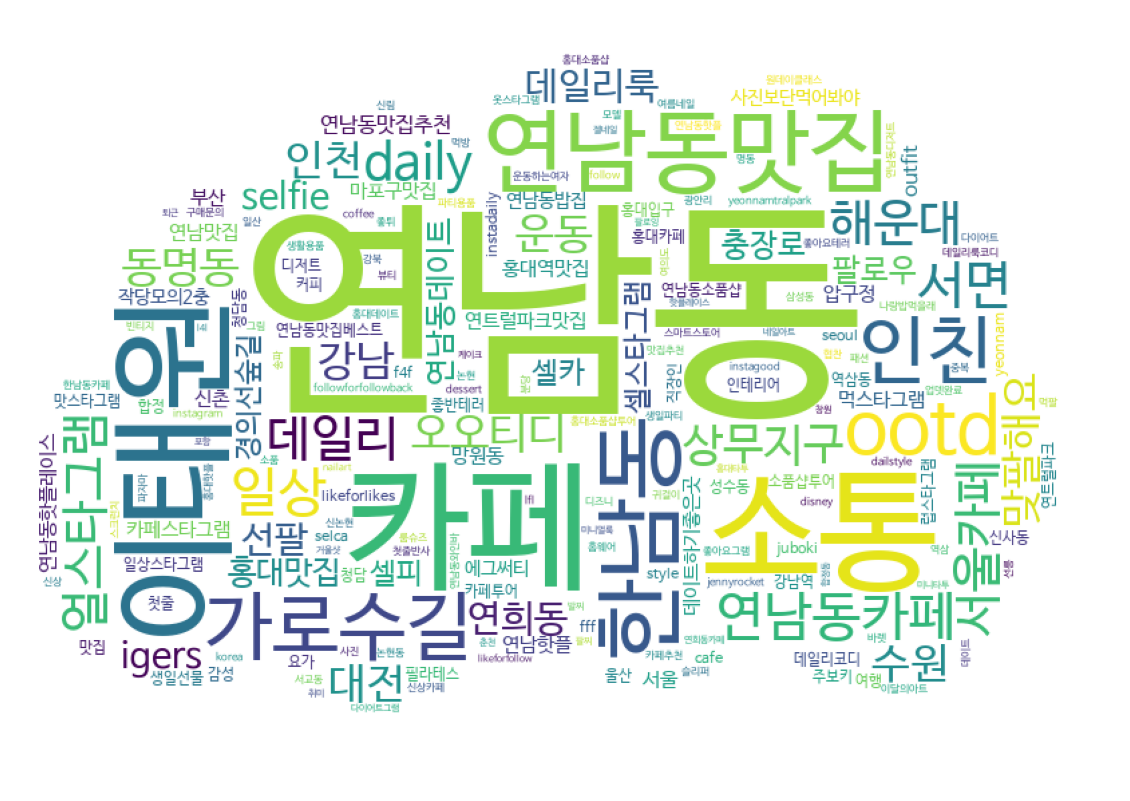

In [100]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
font_path = r'C:/Users/고태영/Downloads/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'

denne_mask = np.array(Image.open('cloud_6.png'))

wc = WordCloud(font_path=font_path, background_color="white", width=800, height=600, mask = denne_mask)
cloud = wc.generate_from_frequencies(dict(common_tag_200))

plt.figure(figsize = (20,16))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('wordcloud_yeonam_instagram')